### Kwantowa Trasformata Fouriera - zadania

In [1]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import QFT

Tworzymy obwód i inicjalizujemy stanem  $\vert 1 \rangle$

In [2]:
nqbits=3
qc = QuantumCircuit(nqbits)
qc.initialize([0,1,0,0,0,0,0,0], qc.qubits)
qc.draw()

┌──────────────────────────────┐
q_0: ┤0                             ├
     │                              │
q_1: ┤1 Initialize(0,1,0,0,0,0,0,0) ├
     │                              │
q_2: ┤2                             ├
     └──────────────────────────────┘

Symulacja

In [3]:

sim = Aer.get_backend("aer_simulator_statevector")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
#plot_bloch_multivector(statevector)

In [4]:
print(statevector)

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j],
            dims=(2, 2, 2))


Prosty wykres ilustrujący amplitudy dla poszczególnych wektorów z bazy obliczeniowej wchodzących w skład naszego stanu. Są to w ogólności liczby zespolone, przedstawiamy je wszystkie na jednej płaszczyźnie zespolonej. 

Tutaj amplituda dla  $\vert 1 \rangle$ wyniosi 1, pozostałe 0. 

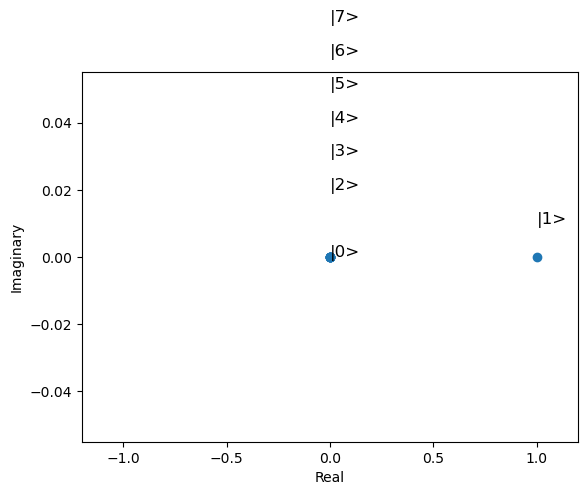

In [5]:
import matplotlib.pyplot as plt
X=[]
Y=[]
for x in range(pow(2,nqbits)):
    X.append(statevector[x].real)
    Y.append(statevector[x].imag)
plt.xlim([-1.2, 1.2])
plt.scatter(X, Y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
for index in range(len(X)):
  plt.text(X[index], Y[index]+index/100, "|"+str(index)+">", size=12)
  #plt.arrow(0,0,X[index], Y[index],width=0.001,head_width=0.02)
plt.show()

Dyskretna tnasformata Fouriera działa na wektor $(x_0, ..., x_{N-1})$ zamieniając go na wektor $(y_0, ..., y_{N-1})$ zgodnie ze wzorem:


$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_je^{2\pi i \frac{jk}{N}}$$

Kwantowa trasformata Fouriera działa na stan $\vert X\rangle = \sum_{j=0}^{N-1} x_j \vert j \rangle$ i zamienia go na stan $\vert Y\rangle = \sum_{k=0}^{N-1} y_k \vert k \rangle$ zgodnie ze wzorem


$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_je^{2\pi i \frac{jk}{N}}$$


Innymi słowy QFT zamienia stan $\vert j \rangle$ na sumę stanów bazowych zgodnie ze wzorem:

$$\vert j \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}e^{2\pi i \frac{jk}{N}} \vert k \rangle$$




Zobaczmy, jak w praktyce działa QFT

In [6]:
gate_qft = QFT(nqbits).to_gate()
#jeśli chcemy użyć odwrotnej transformaty IQFT
#gate_qft = QFT(nqbits).inverse().to_gate()
qc.append(
    gate_qft,
    qc.qubits
)
qc.draw()

┌──────────────────────────────┐┌──────┐
q_0: ┤0                             ├┤0     ├
     │                              ││      │
q_1: ┤1 Initialize(0,1,0,0,0,0,0,0) ├┤1 QFT ├
     │                              ││      │
q_2: ┤2                             ├┤2     ├
     └──────────────────────────────┘└──────┘

In [7]:
#symulacja
qc.save_statevector()

qc = transpile(qc, sim)
statevector = sim.run(qc).result().get_statevector()
#print(statevector)


In [8]:
#plot_bloch_multivector(statevector)

Rysujemy aplitudy stanu na 3 qbitach (czyli $N=2^3=8$).. Są to w ogólności liczby zespolone, przedstawiamy je wszystkie na jednej płaszczyźnie zespolonej. 


$QFT(\vert j \rangle) = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}e^{2\pi i \frac{jk}{N}} \vert k \rangle$

$j=1$ $N=8$ czyli:

$QFT(\vert 1 \rangle)=\frac{1}{\sqrt{8}}\sum_{k=0}^{7}e^{2\pi i \frac{k}{8}} \vert k \rangle$

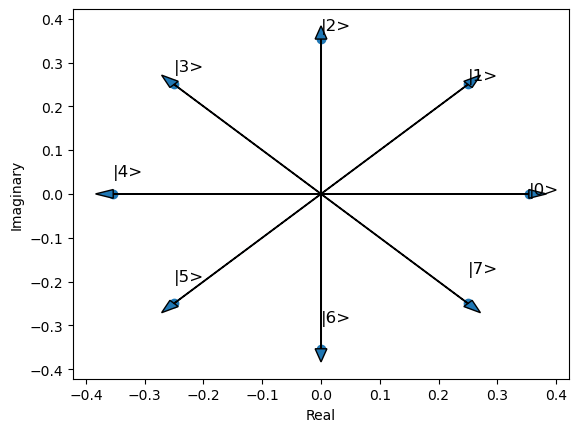

In [9]:
X=[]
Y=[]
for x in range(pow(2,nqbits)):
    X.append(statevector[x].real)
    Y.append(statevector[x].imag)
#plt.xlim([-1.2, 1.2])
plt.scatter(X, Y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
for index in range(len(X)):
  plt.text(X[index], Y[index]+index/100, "|"+str(index)+">", size=12)
  plt.arrow(0,0,X[index], Y[index],width=0.001,head_width=0.02)
plt.show()

Zadania:
1. Sprawdzić działanie trasformaty dla  kilku innych wybranych stanów $\vert j \rangle$. Sprawdzić zgodność ze wzorem.
2.Sprawdzić działanie odwrotnej transformaty dla stanu $\vert 1 \rangle$. Porównać z QFT
3. Sprawdzić działanie odwrotnej trasformaty dla stanów bazowych zmieniających się co pewien okres, który jest potęgą 2, w szczególności dla $\vert 1 \rangle$, $\vert 3 \rangle$, $\vert 5 \rangle$, $\vert 7 \rangle$ Porównać wykresy amplitud na płaszczyźnie zespolonej. Widać, że amplituda stanu $\vert 0 \rangle$ nie zmienia się w zależności od wejscia transformaty - dlaczego? Dla których stanow jeszcze to zachodzi ? Dlaczego?
Wskazówka: przyrównać odpowiednie wykładniki ze wzoru $$QFT(\vert j \rangle) = \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}e^{2\pi i \frac{jk}{N}} \vert k \rangle$$
a dokladniej sprawdzić dla jakiego $k$ zachodzi: $$j_1k \equiv j_2k\mod{N}$$
$$\text{ gdzie }j_1-j_2 =r$$
4. Sprawdzić działanie odwrotnej transformaty dla superpozycji stanów bazowych zmieniających się co pewien okres który jest potęgą 2, w szczególności dla $0.5(\vert 1 \rangle$+$\vert 3 \rangle$+$\vert 5 \rangle$+ $\vert 7 \rangle)$

Dla zainteresowanych:
* https://learn.qiskit.org/course/ch-algorithms/quantum-fourier-transform
* https://learn.qiskit.org/course/ch-algorithms/quantum-phase-estimation

In [10]:
import qiskit.tools.jupyter
%qiskit_version_table